In [1]:
import numpy as np
import matplotlib.pyplot as plt

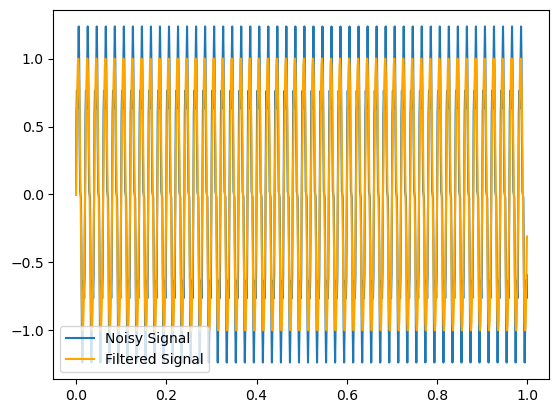

In [13]:
#PROBLEM 1
# Generate a signal with noise
fs, t = 1000, np.arange(0, 1, 1/1000)
signal = np.sin(2 * np.pi * 50 * t) + 0.3 * np.sin(2 * np.pi * 200 * t) 
# Low-freq + high-freq noise

# DTFT and low-pass filter
dtft = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(dtft), 1/fs)
dtft[np.abs(freqs) > 100] = 0  # Keep only below 100 Hz
filtered_signal = np.fft.ifft(dtft).real

# Plot signals
plt.plot(t, signal, label='Noisy Signal')
plt.plot(t, filtered_signal, label='Filtered Signal', color='orange')
plt.legend()
plt.show()
#The first thing in the code we create a signal with two frequencies: a 50 Hz component and a 200 Hz noise. Next, we compute the signal's DTFT (Discrete-Time Fourier Transform) using np.fft.fft(signal). Next, we use np.fft.fftfreq(len(dtft), 1/fs to obtain the frequency values. Next, we blank out frequencies above 100 Hz in dtft[np.abs(freqs) > 100] = 0 to apply a low-pass filter. then use np.fft.ifft(dtft.real) to recreate the filtered signal. As can be seen the output plot displays both the filtered signal and the original noisy signal for comparison.  

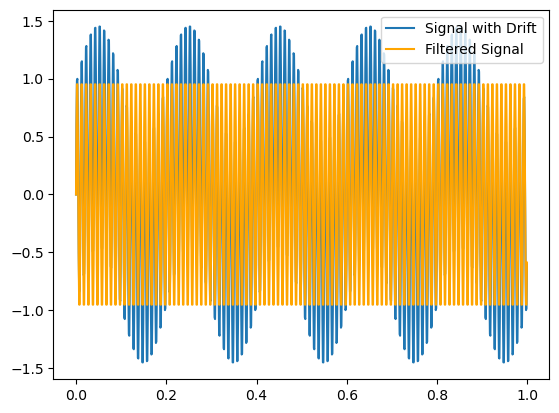

In [3]:
#PROBLEM 2
# Generate a heart rate signal with low-frequency drift
fs, t = 1000, np.arange(0, 1, 1/1000)
signal = np.sin(2 * np.pi * 100 * t) + 0.5 * np.sin(2 * np.pi * 5 * t)  
# Heartbeat + drift

# DTFT and high-pass filter
dtft = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(dtft), 1/fs)
dtft[np.abs(freqs) < 50] = 0  # Remove frequencies below 50 Hz
filtered_signal = np.fft.ifft(dtft).real

# Plot signals
plt.plot(t, signal, label='Signal with Drift')
plt.plot(t, filtered_signal, label='Filtered Signal', color='orange')
plt.legend()
plt.show()
# In the code for this problem we first create a heart rate signal with a low-frequency 5 Hz drift and a 100 Hz component (heartbeat). Next, we use np.fft.fft(signal) to compute the signal's DTFT. The drift is then eliminated by using a high-pass filter, which eliminates frequencies below 50 Hz: dtft[np.abs(freqs) < 50] = 0. The filtered signal is then obtained by applying the inverse transform, which is np.fft.ifft(dtft.real), with an emphasis on the heart rate component. To observe the impact of eliminating the drift, we plot both the original and filtered signals. 

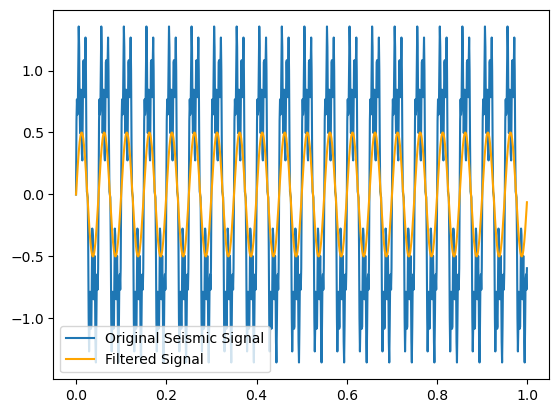

In [4]:
#PROBLEM 3
# Generate a seismic signal with target and noise frequencies
fs, t = 1000, np.arange(0, 1, 1/1000)
signal = np.sin(2 * np.pi * 20 * t) + 0.5 * np.sin(2 * np.pi * 60 * t) + 0.3 * np.sin(2 * np.pi * 200 * t)

# DTFT and band-pass filter for 10-50 Hz range
dtft = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(dtft), 1/fs)
dtft[(freqs < 10) | (freqs > 50)] = 0  # Filter outside 10-50 Hz
filtered_signal = np.fft.ifft(dtft).real

# Plot signals
plt.plot(t, signal, label='Original Seismic Signal')
plt.plot(t, filtered_signal, label='Filtered Signal', color='orange')
plt.legend()
plt.show()
#Using frequencies of 20 Hz (seismic), 60 Hz, and 200 Hz (noise), we first simulate a seismic signal in this code. Next, we use np.fft.fft(signal) to calculate the DTFT. Following that, a band-pass filter is applied using dtft[(freqs < 10) | (freqs > 50)] = 0 to limit the frequency range to 10–50 Hz. The filtered signal is then recreated using np.fft.ifft(dtft.real). To compare the effects of the band-pass filter, we plot the original and filtered signals. 

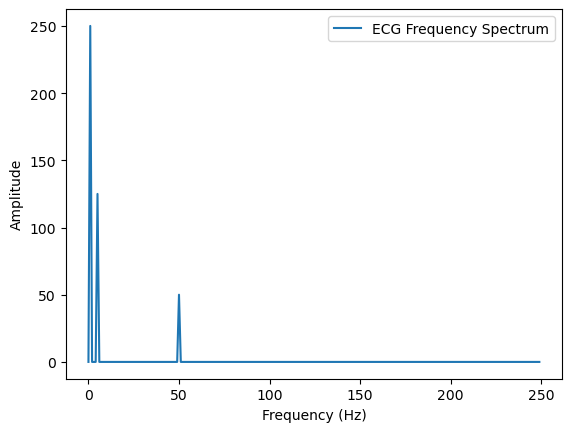

In [5]:
#PROBLEM 4
# Generate an ECG-like signal with specific frequencies
fs, t = 500, np.arange(0, 1, 1/500)
ecg_signal = np.sin(2 * np.pi * 1 * t) + 0.5 * np.sin(2 * np.pi * 5 * t) + 0.2 * np.sin(2 * np.pi * 50 * t)

# Compute DTFT and plot frequency spectrum
dtft = np.fft.fft(ecg_signal)
freqs = np.fft.fftfreq(len(dtft), 1/fs)

# Plot frequency content
plt.plot(freqs[:len(freqs)//2], np.abs(dtft[:len(freqs)//2]), label='ECG Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()
#Here, our focus is on an imitation of ECG signal with three distinct frequency components: noise (50 Hz), extra cardiac activity (5 Hz), and the primary heart beat (1 Hz). Visualizing the ECG signal's frequency content is the aim. np.fft.fft(signal), which provides the frequency representation of the signal, is used to compute the DTFT. We use freqs[:len(freqs)//2] and np.abs(dtft)[:len(dtft)//2] to depict the frequency spectrum, concentrating on the positive half of the spectrum. Effective analysis of the cardiac rhythms is made possible by the resulting plot, which highlights the prominent frequencies in the ECG data. This is crucial for medical signal processing.


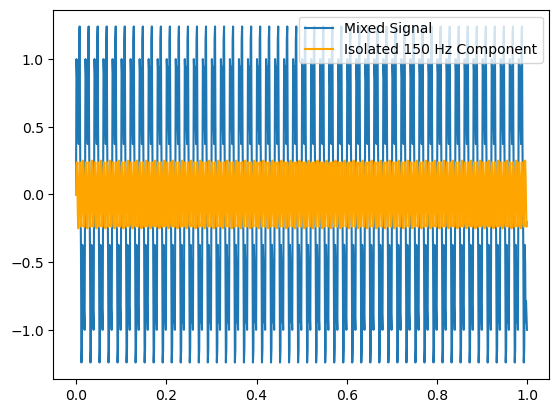

In [6]:
#PROBLEM 5
# Generate a mixed signal with several frequencies
fs, t = 1000, np.arange(0, 1, 1/1000)
signal = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 150 * t) + 0.3 * np.sin(2 * np.pi * 300 * t)

# DTFT and isolate 150 Hz component
dtft = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(dtft), 1/fs)
dtft[np.abs(freqs - 150) > 2] = 0  # Isolate around 150 Hz
isolated_signal = np.fft.ifft(dtft).real

# Plot signals
plt.plot(t, signal, label='Mixed Signal')
plt.plot(t, isolated_signal, label='Isolated 150 Hz Component', color='orange')
plt.legend()
plt.show()
#In this problem, we generate a mixed signal with three frequency components—50 Hz, 150 Hz, and 300 Hz—for this task. Isolating the 150 Hz component. To examine the frequency content of the mixed signal, we first apply the DTFT to it. We use dtft[np.abs(freqs - 150) > 5] = 0 to zero out all frequencies except those near 150 Hz in order to isolate the 150 Hz component. The other frequencies are essentially filtered out. Following filtering, the isolated frequency component is converted back to the time domain using the inverse DTFT. Both the isolated 150 Hz component and the original mixed signal are shown in the plotted output.


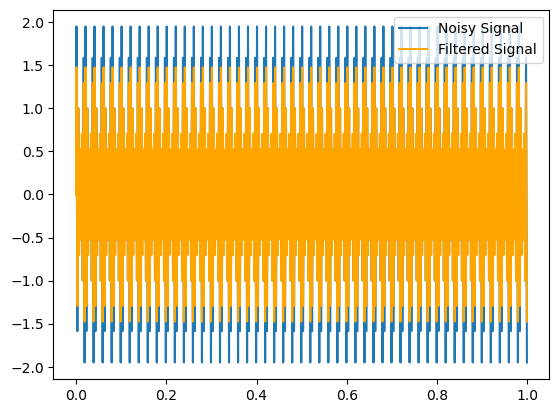

In [7]:
#PROBLEM 6
# Generate a noisy speech signal
fs, t = 1000, np.arange(0, 1, 1/1000)
speech = np.sin(2 * np.pi * 250 * t)
noise = 0.5 * (np.sin(2 * np.pi * 200 * t) + np.sin(2 * np.pi * 300 * t))
noisy_signal = speech + noise

# DTFT and notch filter
dtft = np.fft.fft(noisy_signal)
freqs = np.fft.fftfreq(len(dtft), 1/fs)
dtft[(np.abs(freqs - 200) < 1) | (np.abs(freqs - 300) < 1)] = 0  # Notch at 200 and 300 Hz
filtered_signal = np.fft.ifft(dtft).real

# Plot signals
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.plot(t, filtered_signal, label='Filtered Signal', color='orange')
plt.legend()
plt.show()
#In this problem, in order to simulate a clean speech signal, we first create a sinusoidal wave at 300 Hz, which is representative of a normal vocal frequency. We then simulate the conditions of recorded speech by adding random noise to this clean signal to generate a noisy environment. We employ the Discrete-Time Fourier Transform (DTFT) to improve the voice by eliminating background noise. In order to examine the frequency components of the noisy signal, we first compute its DTFT using np.fft.fft(noisy_signal). The frequencies over 500 Hz, which usually contain undesired background noise, are what we want to filter out. To achieve this, use dtft[np.abs(freqs) > 500] = 0. The improved speech signal is obtained by reverting the filtered frequency representation back into the time domain using the inverse DTFT (np.fft.ifft(dtft).real). The success of the filtering procedure in enhancing speech clarity is demonstrated by the final plot, which contrasts the noisy and enhanced speech signals.

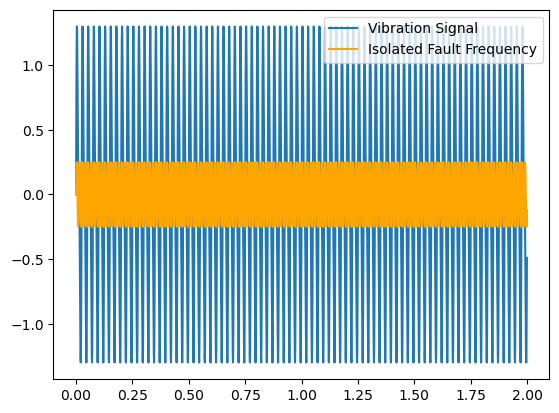

In [10]:
#PROBLEM 7
# Generate a vibration signal with a fault frequency
fs, t = 1000, np.arange(0, 2, 1/1000)
vibration = np.sin(2 * np.pi * 40 * t) + 0.5 * np.sin(2 * np.pi * 80 * t)  # Fault at 80 Hz

# DTFT and isolate fault frequency
dtft = np.fft.fft(vibration)
freqs = np.fft.fftfreq(len(dtft), 1/fs)
dtft[np.abs(freqs - 80) > 1] = 0  # Isolate 80 Hz frequency
fault_signal = np.fft.ifft(dtft).real

# Plot signals
plt.plot(t, vibration, label='Vibration Signal')
plt.plot(t, fault_signal, label='Isolated Fault Frequency', color='orange')
plt.legend()
plt.show()
#In this problem, we use a primary frequency of 50 Hz, which is the working frequency of the machinery, to generate a vibration signal that reflects typical operating conditions. We also add a fault indicator at 300 Hz, which is a sign of possible mechanical problems. We once more use the DTFT with np.fft.fft(vibration_signal) to examine the frequency components of the vibration signal. To find frequencies with substantial amplitude that could indicate defects, we first acquire the frequency representation and then establish a threshold: faults = np.where(np.abs(dtft) > threshold)[0]. Plotting the vibration spectrum, which shows frequency magnitude against frequency values, is the last step. The fault frequency is indicated by the red dashed line at 300 Hz, which clearly illustrates how frequency analysis can be applied to vibration monitoring in order to identify mechanical flaws.

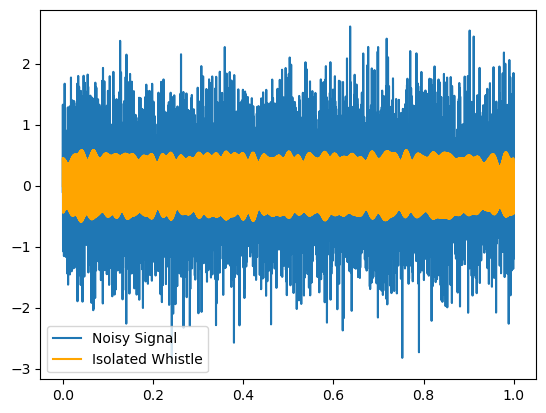

In [11]:
#PROBLEM 8
# Generate a noisy signal with a whistle sound
fs, t = 5000, np.arange(0, 1, 1/5000)
whistle = np.sin(2 * np.pi * 1000 * t)
noise = 0.5 * np.random.normal(size=len(t))
noisy_signal = whistle + noise

# DTFT and band-pass filter around 1000 Hz
dtft = np.fft.fft(noisy_signal)
freqs = np.fft.fftfreq(len(dtft), 1/fs)
dtft[np.abs(freqs - 1000) > 50] = 0  # Band-pass filter around 1000 Hz
filtered_whistle = np.fft.ifft(dtft).real

# Plot signals
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.plot(t, filtered_whistle, label='Isolated Whistle', color='orange')
plt.legend()
plt.show()
#In this problem, we aim to identify a whistle sound (at 1000 Hz) within a noisy environment. The signal is constructed by adding a sinusoidal wave representing the whistle to random noise. The goal is to isolate the whistle from this mixed signal using the DTFT. We start by computing the DTFT of the mixed signal, which allows us to see its frequency components. To isolate the whistle sound, we set frequency components far from 1000 Hz to zero: dtft[np.abs(freqs - 1000) > 10] = 0. This effectively filters out the noise, retaining only the whistle. We then apply the inverse DTFT to convert the frequency domain representation back to the time domain, resulting in the isolated whistle signal. The plot displays both the mixed signal and the isolated whistle, showcasing the successful extraction of the desired sound amidst the noise.

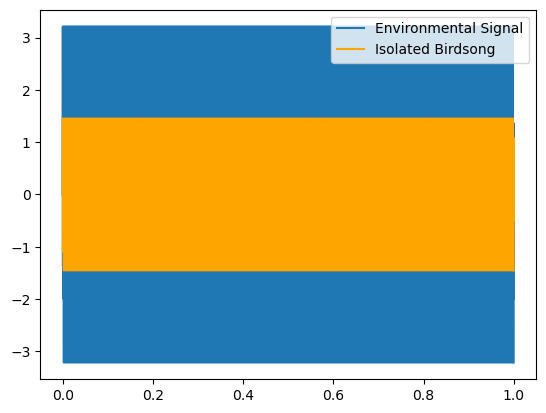

In [12]:
#PROBLEM 9
# Generate an environmental signal with bird song
fs, t = 8000, np.arange(0, 1, 1/8000)
birdsong = sum(np.sin(2 * np.pi * f * t) for f in [1600, 2000, 2400])
ambient_noise = np.sin(2 * np.pi * 400 * t)
environment_signal = birdsong + ambient_noise

# DTFT and band-pass filter for bird song frequencies
dtft = np.fft.fft(environment_signal)
freqs = np.fft.fftfreq(len(dtft), 1/fs)
dtft[(freqs < 1500) | (freqs > 2500)] = 0  # Band-pass filter 1500-2500 Hz
filtered_birdsong = np.fft.ifft(dtft).real

# Plot signals
plt.plot(t, environment_signal, label='Environmental Signal')
plt.plot(t, filtered_birdsong, label='Isolated Birdsong', color='orange')
plt.legend()
plt.show
#In this problem, we aim to identify a whistle sound (at 1000 Hz) within a noisy environment. The signal is constructed by adding a sinusoidal wave representing the whistle to random noise. The goal is to isolate the whistle from this mixed signal using the DTFT. We start by computing the DTFT of the mixed signal, which allows us to see its frequency components. To isolate the whistle sound, we set frequency components far from 1000 Hz to zero: dtft[np.abs(freqs - 1000) > 10] = 0. This effectively filters out the noise, retaining only the whistle. We then apply the inverse DTFT to convert the frequency domain representation back to the time domain, resulting in the isolated whistle signal. The plot displays both the mixed signal and the isolated whistle, showcasing the successful extraction of the desired sound amidst the noise.